In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from utils import load_svhn_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_svhn_data()

In [3]:
import network, train, utils
from layers import ReluLayer, TernaryFullyConnectedLayer, \
    TernaryConvolutionLayer, BatchNormLayer, MaxPoolingLayer, DropOutLayer

In [4]:
nn = network.NeuralNetwork(in_size=[None, 32, 32, 3], n_out_classes=10,
                           loss_func=utils.smooth_hinge_loss)
nn.reset_graph()

# Hidden Conv-1
nn.add_layer(TernaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-2
nn.add_layer(TernaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-3
nn.add_layer(TernaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-4
nn.add_layer(TernaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-5
nn.add_layer(TernaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-6
nn.add_layer(TernaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Fc-7
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-8
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-9
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

In [5]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [6]:
opt.set_rho(0.25)
opt.set_ema_rates(0.999)

In [7]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []
sparsity_fracs = []

n_epochs = 200

for t in range(n_epochs):    
    print('Epoch: ', t)
    opt.train_epoch(batch_size=100, ema_decay=0.95, n_output=10, verbose=True)

    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    sparsity_fracs.append(utils.get_sparsity_frac(nn, opt))

    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)
sparsity_fracs = np.asarray(sparsity_fracs)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 2.373887, 0.11
Iter: 68 of 682 || Estimated train loss/acc: 2.091202, 0.18
Iter: 136 of 682 || Estimated train loss/acc: 1.751957, 0.23
Iter: 204 of 682 || Estimated train loss/acc: 1.568507, 0.29
Iter: 272 of 682 || Estimated train loss/acc: 1.397124, 0.30
Iter: 340 of 682 || Estimated train loss/acc: 1.318553, 0.26
Iter: 408 of 682 || Estimated train loss/acc: 1.134544, 0.40
Iter: 476 of 682 || Estimated train loss/acc: 1.034272, 0.39
Iter: 544 of 682 || Estimated train loss/acc: 0.932190, 0.46
Iter: 612 of 682 || Estimated train loss/acc: 0.770082, 0.65
Iter: 680 of 682 || Estimated train loss/acc: 0.789119, 0.68
Sparsity fraction (ratio of non-zero weights):  0.851542115767
Train loss/acc:  (0.8550582753

Iter: 408 of 682 || Estimated train loss/acc: 0.035702, 0.95
Iter: 476 of 682 || Estimated train loss/acc: 0.023513, 0.98
Iter: 544 of 682 || Estimated train loss/acc: 0.015644, 0.99
Iter: 612 of 682 || Estimated train loss/acc: 0.065489, 0.92
Iter: 680 of 682 || Estimated train loss/acc: 0.021943, 0.98
Sparsity fraction (ratio of non-zero weights):  0.0913658695034
Train loss/acc:  (0.057299989278431378, 0.91275620442958161) Test loss/acc:  (0.064821482050451823, 0.90373386432586744)
Epoch:  8
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9993366, 0.9993366, 0.9993366, 0.9993366, 0.9993366, 0.9993366, 0.9993366, 0.9993366, 0.9993366]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.034414, 0.96
Iter: 68 of 682 || Estimated train loss/acc: 0.062683, 0.92
Iter: 136 of 682 || Estimated train loss/acc: 0.025782, 0.99
Iter: 204 of 682 || Estimated train loss/acc: 0.017758, 0.98
Iter: 272 of 682 || Estimated train los

Iter: 68 of 682 || Estimated train loss/acc: 0.014308, 0.99
Iter: 136 of 682 || Estimated train loss/acc: 0.013334, 0.98
Iter: 204 of 682 || Estimated train loss/acc: 0.021974, 0.96
Iter: 272 of 682 || Estimated train loss/acc: 0.010330, 0.98
Iter: 340 of 682 || Estimated train loss/acc: 0.041091, 0.94
Iter: 408 of 682 || Estimated train loss/acc: 0.018556, 0.98
Iter: 476 of 682 || Estimated train loss/acc: 0.025456, 0.98
Iter: 544 of 682 || Estimated train loss/acc: 0.020754, 0.97
Iter: 612 of 682 || Estimated train loss/acc: 0.028568, 0.98
Iter: 680 of 682 || Estimated train loss/acc: 0.014583, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0750238149524
Train loss/acc:  (0.051680005024477033, 0.93741301192636795) Test loss/acc:  (0.068389288783439778, 0.91502766691253601)
Epoch:  16
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99955988, 0.99955988, 0.99955988, 0.99955988, 0.99955988, 0.99955988, 0.99955988, 0.99955988, 0.99955988]
rho:
[0.25, 0.25, 0.25, 0.

Sparsity fraction (ratio of non-zero weights):  0.0764762928005
Train loss/acc:  (0.017137266821709681, 0.97547505287927294) Test loss/acc:  (0.045318237388507675, 0.93619391554766218)
Epoch:  23
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99969268, 0.99969268, 0.99969268, 0.99969268, 0.99969268, 0.99969268, 0.99969268, 0.99969268, 0.99969268]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.018001, 0.98
Iter: 68 of 682 || Estimated train loss/acc: 0.006007, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.010779, 0.99
Iter: 204 of 682 || Estimated train loss/acc: 0.007802, 0.99
Iter: 272 of 682 || Estimated train loss/acc: 0.001743, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.024254, 0.96
Iter: 408 of 682 || Estimated train loss/acc: 0.017594, 0.96
Iter: 476 of 682 || Estimated train loss/acc: 0.018630, 0.97
Iter: 544 of 682 || Estimated train loss/acc: 0.014022, 1.00
Iter: 612 of 682 || Estimated

Iter: 204 of 682 || Estimated train loss/acc: 0.013810, 0.98
Iter: 272 of 682 || Estimated train loss/acc: 0.004964, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.010085, 0.99
Iter: 408 of 682 || Estimated train loss/acc: 0.009460, 0.99
Iter: 476 of 682 || Estimated train loss/acc: 0.003263, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.005983, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.011827, 0.98
Iter: 680 of 682 || Estimated train loss/acc: 0.007963, 0.99
Sparsity fraction (ratio of non-zero weights):  0.0747339752699
Train loss/acc:  (0.0069950567327272447, 0.99164921604437994) Test loss/acc:  (0.044270063779639116, 0.94349261878382307)
Epoch:  31
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99979615, 0.99979615, 0.99979615, 0.99979615, 0.99979615, 0.99979615, 0.99979615, 0.99979615, 0.99979615]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.001260, 1.00
Iter: 68 of 682 || Estimate

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9998576, 0.9998576, 0.9998576, 0.9998576, 0.9998576, 0.9998576, 0.9998576, 0.9998576, 0.9998576]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.002711, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.005400, 0.99
Iter: 136 of 682 || Estimated train loss/acc: 0.000163, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.009102, 0.99
Iter: 272 of 682 || Estimated train loss/acc: 0.000857, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.001522, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.003023, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.004912, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.002297, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.006780, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.008726, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0669287612789
Train loss/acc:  (0.0039304172429729398, 0.99610

Iter: 408 of 682 || Estimated train loss/acc: 0.000743, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000907, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.001420, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000205, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.003084, 1.00
Sparsity fraction (ratio of non-zero weights):  0.053637987738
Train loss/acc:  (0.00098572218979310839, 0.99938467908132966) Test loss/acc:  (0.054077497643396283, 0.94622002863488319)
Epoch:  46
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99990547, 0.99990547, 0.99990547, 0.99990547, 0.99990547, 0.99990547, 0.99990547, 0.99990547, 0.99990547]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.001186, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.004468, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.001151, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.001377, 1.00
Iter: 272 of 682 || Estimate

Iter: 68 of 682 || Estimated train loss/acc: 0.002241, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000698, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000534, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000564, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000006, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000239, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.001372, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000421, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000263, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.001248, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0492233983078
Train loss/acc:  (0.00048154833933417945, 0.99980954352517348) Test loss/acc:  (0.054899574768601862, 0.94744928647347881)
Epoch:  54
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99993724, 0.99993724, 0.99993724, 0.99993724, 0.99993724, 0.99993724, 0.99993724, 0.99993724, 0.99993724]
rho:
[0.25, 0.25, 0.25, 

Iter: 680 of 682 || Estimated train loss/acc: 0.000264, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0379012233858
Train loss/acc:  (0.00022244575875064932, 0.99991209701161854) Test loss/acc:  (0.059130985048252087, 0.94898585358791432)
Epoch:  61
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99995625, 0.99995625, 0.99995625, 0.99995625, 0.99995625, 0.99995625, 0.99995625, 0.99995625, 0.99995625]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000090, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000299, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000235, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.001243, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000829, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000617, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.001479, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.001631, 1.00
Iter: 544 of 682 || Estimat

Iter: 68 of 682 || Estimated train loss/acc: 0.000190, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.001296, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000788, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000777, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.002138, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000342, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.001172, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.002585, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000499, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000156, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0371794351249
Train loss/acc:  (9.4909778564756077e-05, 0.99997069900387281) Test loss/acc:  (0.056518983035208116, 0.95102181101988337)
Epoch:  69
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99997097, 0.99997097, 0.99997097, 0.99997097, 0.99997097, 0.99997097, 0.99997097, 0.99997097, 0.99997097]
rho:
[0.25, 0.25, 0.25, 

Iter: 680 of 682 || Estimated train loss/acc: 0.001255, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0348176165059
Train loss/acc:  (0.00010658485390957773, 0.99995604850580921) Test loss/acc:  (0.061336442515638682, 0.95090656743580093)
Epoch:  76
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99997973, 0.99997973, 0.99997973, 0.99997973, 0.99997973, 0.99997973, 0.99997973, 0.99997973, 0.99997973]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000516, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000088, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000080, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000959, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000306, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000288, 1.00
Iter: 544 of 682 || Estimat

Iter: 136 of 682 || Estimated train loss/acc: 0.000001, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000399, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000051, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000118, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.001117, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000094, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000447, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000326, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000022, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0321103639549
Train loss/acc:  (5.3278990736719417e-05, 0.99997069900387281) Test loss/acc:  (0.068446606660940643, 0.94971572565167828)
Epoch:  84
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99998653, 0.99998653, 0.99998653, 0.99998653, 0.99998653, 0.99998653, 0.99998653, 0.99998653, 0.99998653]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estima

Sparsity fraction (ratio of non-zero weights):  0.0302955865037
Train loss/acc:  (2.53790969553075e-05, 0.99997069900387281) Test loss/acc:  (0.066948017224522913, 0.95159802622932854)
Epoch:  91
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999058, 0.99999058, 0.99999058, 0.99999058, 0.99999058, 0.99999058, 0.99999058, 0.99999058, 0.99999058]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000008, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.001918, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.001045, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000015, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000098, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000031, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000363, 1.00
Iter: 612 of 682 || Estimated

Iter: 136 of 682 || Estimated train loss/acc: 0.000015, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000030, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000202, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000077, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000618, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000452, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000001, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0289877161695
Train loss/acc:  (2.0313174764825214e-05, 0.99997069900387281) Test loss/acc:  (0.072727471418316994, 0.95048401006981131)
Epoch:  99
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999938, 0.9999938, 0.9999938, 0.9999938, 0.9999938, 0.9999938, 0.9999938, 0.9999938, 0.9999938]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565, 0.99999565]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000548, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.003135, 0.99
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000180, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000467, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0278389765661
Train loss/acc:  (1.6198388316108635e-0

Iter: 408 of 682 || Estimated train loss/acc: 0.000002, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000038, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0273094257239
Train loss/acc:  (1.8730073230705413e-05, 0.99997069900387281) Test loss/acc:  (0.078985109809641837, 0.95006145545142373)
Epoch:  114
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714, 0.99999714]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000042, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000009, 1.00
Iter: 272 of 682 || Estima

Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000026, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000072, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000221, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000171, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000010, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0267976775346
Train loss/acc:  (1.3160571434762348e-05, 0.99997069900387281) Test loss/acc:  (0.079900270750369484, 0.95048401281741324)
Epoch:  122
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809, 0.99999809]
rho:
[0.25, 0.25, 0.25,

Iter: 680 of 682 || Estimated train loss/acc: 0.000449, 1.00
Sparsity fraction (ratio of non-zero weights):  0.026621524969
Train loss/acc:  (1.2896356491734688e-05, 0.99997069900387281) Test loss/acc:  (0.081330054743557742, 0.95025352381751371)
Epoch:  129
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999863, 0.99999863, 0.99999863, 0.99999863, 0.99999863, 0.99999863, 0.99999863, 0.99999863, 0.99999863]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000014, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000081, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000005, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000286, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000011, 1.00
Iter: 544 of 682 || Estimat

Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000008, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000001, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000328, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000093, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000051, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0263515180666
Train loss/acc:  (1.7790372418602319e-05, 0.99997069900387281) Test loss/acc:  (0.086348795854631344, 0.94952365450135168)
Epoch:  137
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999911, 0.99999911, 0.99999911, 0.99999911, 0.99999911, 0.99999911, 0.99999911, 0.99999911, 0.99999911]
rho:
[0.25, 0.25, 0.25,

Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0262531349847
Train loss/acc:  (1.4136937175897414e-05, 0.99997069900387281) Test loss/acc:  (0.086785114550597842, 0.94948524027861325)
Epoch:  144
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000054, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000003, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000134, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000003, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train

Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000023, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000289, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000008, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0261584998298
Train loss/acc:  (1.257356225392143e-05, 0.9999853495019364) Test loss/acc:  (0.088983666854690169, 0.94944682605587494)
Epoch:  152
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train 

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000399, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000165, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000009, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000023, 1.00
Sparsity fraction (ratio of non-zero weights):  0.026051840076
Train loss/acc:  (1.2046472795942274e-05, 0.99998

Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000158, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000032, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0259714158106
Train loss/acc:  (1.2578737915250511e-05, 0.99997069900387281) Test loss/acc:  (0.093618399422952345, 0.94998462517421234)
Epoch:  167
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000058, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000080, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000005, 1.00
Iter: 340 of 682 || Estimated train

Iter: 68 of 682 || Estimated train loss/acc: 0.000560, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000096, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000082, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000280, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000036, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000013, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000022, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0257746496469
Train loss/acc:  (1.3075809399720554e-05, 0.9999853495019364) Test loss/acc:  (0.095005149385801985, 0.94890902785340481)
Epoch:  175
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.2

Sparsity fraction (ratio of non-zero weights):  0.0256520612036
Train loss/acc:  (1.2791233724876126e-05, 0.99997069900387281) Test loss/acc:  (0.097433752748375665, 0.94971572653091096)
Epoch:  182
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000021, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000012, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000400, 1.00
Iter: 612 of 682 || Estimated train

Iter: 204 of 682 || Estimated train loss/acc: 0.000172, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000058, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000068, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000105, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000144, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000000, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0255408727048
Train loss/acc:  (1.1976485225847876e-05, 0.99997069900387281) Test loss/acc:  (0.09783834940224391, 0.94879378426932237)
Epoch:  190
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000016, 1.00
Iter: 68 of 682 || Estimated train 

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 68 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 204 of 682 || Estimated train loss/acc: 0.000546, 1.00
Iter: 272 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 340 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 408 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 476 of 682 || Estimated train loss/acc: 0.000501, 1.00
Iter: 544 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 612 of 682 || Estimated train loss/acc: 0.000000, 1.00
Iter: 680 of 682 || Estimated train loss/acc: 0.000092, 1.00
Sparsity fraction (ratio of non-zero weights):  0.025394547391
Train loss/acc:  (1.2085080365732002e-05, 0.99997

In [12]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True,
                                       max_batch=400))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True,
                                      max_batch=400))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True,
                                     max_batch=400))

Train:  (1.1567930216535579e-05, 0.99997069900387281)
Valid:  (0.11807159632444382, 0.94599999189376827)
Test:  (0.098271599667949336, 0.94910109808786414)


In [13]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  79
Train acc:  0.999970699004
Valid acc:  0.950199990273
Test acc:  0.952366308852


Final results:  [  1.15679302e-05   9.99970699e-01   1.18071596e-01   9.45999992e-01
   9.82715997e-02   9.49101098e-01]


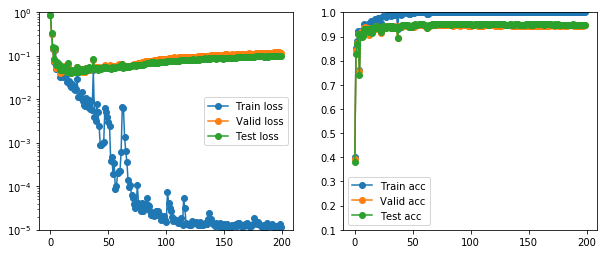

In [14]:
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax1.set_ylim(1e-5,1)
ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])

Final sparsity fraction:  0.0253622215212


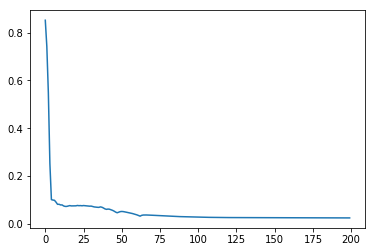

In [15]:
# plot sparsity fracs
plt.plot(sparsity_fracs)
print('Final sparsity fraction: ', sparsity_fracs[-1])